In [52]:
import json
import os
import re
from langdetect import detect

# Data

In [53]:
DATA_DIR = '../job-descriptions/'
OUTPUT_DIR = '../software-jobs/'

In [54]:
files = os.listdir(DATA_DIR)
print("Number of files: ", len(files))

Number of files:  17180


## Cleaning

In [56]:
job_descriptions = []
for file in files:
    if ".json" in file:
        with open(DATA_DIR + file, 'r') as f:
            data = json.load(f)
            data['content'] = re.sub(r'\n+', '\n', data['content'])  # remove multiple newlines
            data['content'] = re.sub(r'\t+', '\t', data['content'])  # remove multiple tabs
            data['content'] = re.sub(r'\r+', '\r', data['content'])  # remove multiple carriage returns
            data['content'] = re.sub(r'\r\n+', '\r\n', data['content'])  # remove multiple carriage returns
            data['content'] = re.sub(r'\n\r+', '\n\r', data['content'])  # remove multiple carriage returns
            data['file'] = file
            try:
                if detect(data['content']) == 'en':
                    job_descriptions.append(data)
            except:
                print("Error in file: ", file)
                pass

Error in file:  lucidsoftware-4018249004.json
Error in file:  thoughtworks-3772551.json
Error in file:  jdsports-4121835101.json


# EDA

In [57]:
job_titles = [job['title'] for job in job_descriptions]

In [58]:
# split job titles into words
job_titles_words = []
for title in job_titles:
    job_titles_words.extend(title.split(' '))

In [59]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(job_titles_words))

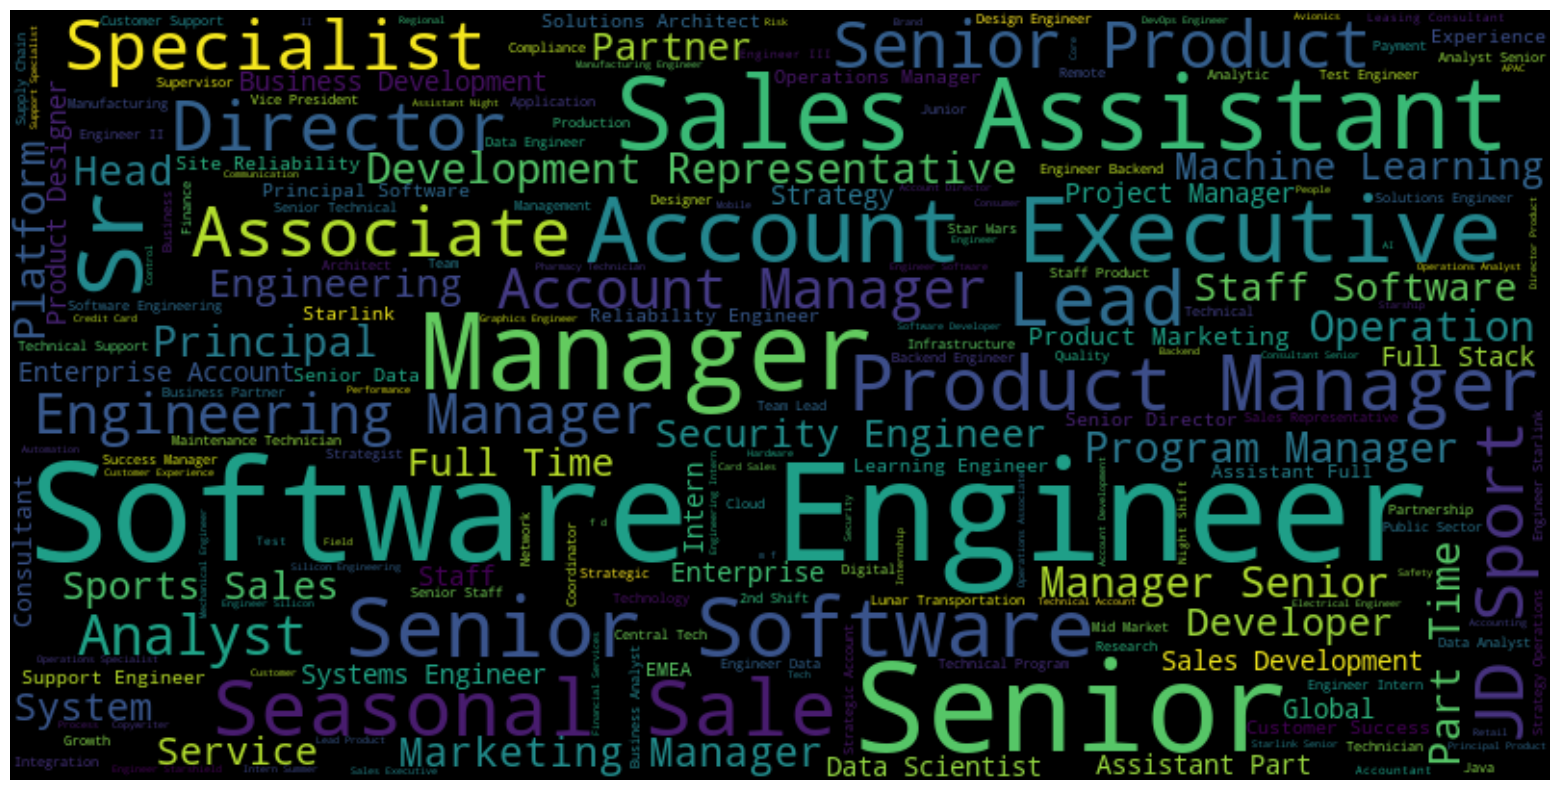

In [61]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
# most common words
from collections import Counter

In [63]:
Counter(job_titles_words).most_common(50)

[('-', 4100),
 ('Engineer', 3192),
 ('Senior', 2902),
 ('Manager', 1949),
 ('', 1872),
 ('Software', 1737),
 ('Sales', 1362),
 ('Product', 995),
 ('Manager,', 973),
 ('Account', 920),
 ('Engineer,', 905),
 ('&', 901),
 ('Assistant', 824),
 ('Data', 698),
 ('Operations', 689),
 ('Analyst', 616),
 ('Lead', 606),
 ('Sr.', 586),
 ('Engineering', 571),
 ('Specialist', 548),
 ('Executive', 532),
 ('Technical', 525),
 ('Staff', 515),
 ('and', 506),
 ('Development', 503),
 ('Business', 470),
 ('Marketing', 456),
 ('Seasonal', 434),
 ('of', 433),
 ('Security', 399),
 ('Principal', 384),
 ('Associate', 382),
 ('Systems', 370),
 ('Customer', 346),
 ('Director', 345),
 ('Director,', 343),
 ('Support', 337),
 ('Technician', 325),
 ('Representative', 314),
 ('Sports', 309),
 ('Developer', 304),
 ('JD', 303),
 ('Intern', 293),
 ('Program', 285),
 ('Time', 284),
 ('Enterprise', 283),
 ('Solutions', 278),
 ('Consultant', 276),
 ('Designer', 270),
 ('Services', 256)]

In [64]:
software_job_titles = ['software', 'data', 'engineer', 'full stack']
software_jobs_count = 0
for job in job_descriptions:
    if any(word in job['title'].lower() for word in software_job_titles):
        software_jobs_count += 1
        with open(OUTPUT_DIR + job['file'], 'w') as f:
            json.dump(job, f)
print("Number of software jobs: ", software_jobs_count)

Number of software jobs:  5351
